# Importing Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from math import sqrt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import random


Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas data frame
car_dataset = pd.read_csv('/content/car details v4.csv')

In [ ]:
# inspecting the first 5 rows of the data frame
car_dataset.head()
print(car_dataset.Make.value_counts())

Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: Make, dtype: int64


In [ ]:
car_dataset.drop(['Model','Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Color','Kilometer'], axis=1, inplace = True)

In [ ]:
# checking the number of rows and columns
car_dataset.shape

(2059, 12)

# New Section

In [ ]:
# getting dataset information
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Fuel Type           2059 non-null   object 
 4   Transmission        2059 non-null   object 
 5   Location            2059 non-null   object 
 6   Owner               2059 non-null   object 
 7   Seller Type         2059 non-null   object 
 8   Engine              1979 non-null   object 
 9   Drivetrain          1923 non-null   object 
 10  Seating Capacity    1995 non-null   float64
 11  Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 193.2+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

Make                    0
Price                   0
Year                    0
Fuel Type               0
Transmission            0
Location                0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain            136
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [ ]:
car_dataset = car_dataset.dropna(axis=0, how='any')
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Price               1874 non-null   int64  
 2   Year                1874 non-null   int64  
 3   Fuel Type           1874 non-null   object 
 4   Transmission        1874 non-null   object 
 5   Location            1874 non-null   object 
 6   Owner               1874 non-null   object 
 7   Seller Type         1874 non-null   object 
 8   Engine              1874 non-null   object 
 9   Drivetrain          1874 non-null   object 
 10  Seating Capacity    1874 non-null   float64
 11  Fuel Tank Capacity  1874 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 190.3+ KB


In [ ]:
car_dataset.isnull().sum()

Make                  0
Price                 0
Year                  0
Fuel Type             0
Transmission          0
Location              0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [ ]:
car_dataset.shape


(1874, 12)

In [ ]:
categories = ['Excellent', 'Fine', 'Very Good', 'Good', 'Restorable', 'Parts Car']

def assign_category():
    return random.choice(categories)

# Add a new column with random categorical values
car_dataset['Condition'] = car_dataset.apply(lambda x: assign_category(), axis=1)

# Print the updated dataset
print(car_dataset)

               Make    Price  Year Fuel Type Transmission    Location   Owner  \
0             Honda   505000  2017    Petrol       Manual        Pune   First   
1     Maruti Suzuki   450000  2014    Diesel       Manual    Ludhiana  Second   
2           Hyundai   220000  2011    Petrol       Manual     Lucknow   First   
3            Toyota   799000  2019    Petrol       Manual   Mangalore   First   
4            Toyota  1950000  2018    Diesel       Manual      Mumbai   First   
...             ...      ...   ...       ...          ...         ...     ...   
2053  Maruti Suzuki   245000  2014    Petrol       Manual   Faridabad  Second   
2054       Mahindra   850000  2016    Diesel       Manual       Surat   First   
2055        Hyundai   275000  2014    Petrol       Manual   Ahmedabad  Second   
2056           Ford   240000  2013    Petrol       Manual       Thane   First   
2057            BMW  4290000  2018    Diesel    Automatic  Coimbatore   First   

     Seller Type   Engine D

<ipython-input-11-5ace9568dd60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset['Condition'] = car_dataset.apply(lambda x: assign_category(), axis=1)


In [ ]:
scaler = MinMaxScaler()
car_dataset['Price'] = scaler.fit_transform(car_dataset[['Price']])

<ipython-input-12-6cc1f1df7f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset['Price'] = scaler.fit_transform(car_dataset[['Price']])


In [ ]:
car_dataset.shape

(1874, 13)

In [ ]:
car_dataset.head()

,Make,Price,Year,Fuel Type,Transmission,Location,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Condition
0,Honda,0.013047,2017,Petrol,Manual,Pune,First,Corporate,1198 cc,FWD,5.0,35.0,Very Good
1,Maruti Suzuki,0.011473,2014,Diesel,Manual,Ludhiana,Second,Individual,1248 cc,FWD,5.0,42.0,Good
2,Hyundai,0.004893,2011,Petrol,Manual,Lucknow,First,Individual,1197 cc,FWD,5.0,35.0,Good
3,Toyota,0.021459,2019,Petrol,Manual,Mangalore,First,Individual,1197 cc,FWD,5.0,37.0,Restorable
4,Toyota,0.054390,2018,Diesel,Manual,Mumbai,First,Individual,2393 cc,RWD,7.0,55.0,Good


In [ ]:
car_dataset['Engine'] = car_dataset['Engine'].str.replace('cc', '')
car_dataset['Engine'] = car_dataset['Engine'].astype(int)

In [ ]:
car_dataset.head()

,Make,Price,Year,Fuel Type,Transmission,Location,Owner,Seller Type,Engine,Drivetrain,Seating Capacity,Fuel Tank Capacity,Condition
0,Honda,0.013047,2017,Petrol,Manual,Pune,First,Corporate,1198,FWD,5.0,35.0,Very Good
1,Maruti Suzuki,0.011473,2014,Diesel,Manual,Ludhiana,Second,Individual,1248,FWD,5.0,42.0,Good
2,Hyundai,0.004893,2011,Petrol,Manual,Lucknow,First,Individual,1197,FWD,5.0,35.0,Good
3,Toyota,0.021459,2019,Petrol,Manual,Mangalore,First,Individual,1197,FWD,5.0,37.0,Restorable
4,Toyota,0.054390,2018,Diesel,Manual,Mumbai,First,Individual,2393,RWD,7.0,55.0,Good


In [ ]:
car_dataset = pd.get_dummies(car_dataset, drop_first = True)

# label_encoder = LabelEncoder()
# for col in car_dataset.columns:
#     if car_dataset[col].dtype == 'object':
#         car_dataset.loc[:, col] = label_encoder.fit_transform(car_dataset.loc[:, col])

In [ ]:
car_dataset.head()

,Price,Year,Engine,Seating Capacity,Fuel Tank Capacity,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,...,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Condition_Fine,Condition_Good,Condition_Parts Car,Condition_Restorable,Condition_Very Good
0,0.013047,2017,1198,5.0,35.0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0.011473,2014,1248,5.0,42.0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0.004893,2011,1197,5.0,35.0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0.021459,2019,1197,5.0,37.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0.054390,2018,2393,7.0,55.0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
X = car_dataset.drop(['Price'],axis=1)
Y = car_dataset['Price']


CROSS VALIDATION (Linear Regression)

In [ ]:
mae_scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)


In [ ]:
scores = cross_val_score(LinearRegression(), X, Y, cv=10)
accuracies = cross_val_score(LinearRegression(), X, Y,scoring='neg_root_mean_squared_error', cv=10)
mae_scores = -cross_val_score(LinearRegression(), X, Y, cv=10, scoring=mae_scorer)
max_error_scores = -cross_val_score(LinearRegression(), X, Y, cv=10, scoring='neg_mean_squared_log_error')

print("Cross-validation scores:", scores)
print('\n')
print("R2 score:", scores.mean())
print("RMSE score:", -accuracies.mean())
print("MAE score:", mae_scores.mean())
print("RMSLE:", max_error_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 525, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters 

Cross-validation scores: [0.69536481 0.53427384 0.46813557 0.72430564 0.78085341 0.7349795
 0.70299614 0.69301799 0.74196273 0.57740536]


R2 score: 0.665329500605038
RMSE score: 0.03870081211836274
MAE score: 0.020789246006404506
RMSLE: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 525, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters 

Splitting Training and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [ ]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)


In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.7666489155065911


Visualize the actual prices and predicted prices


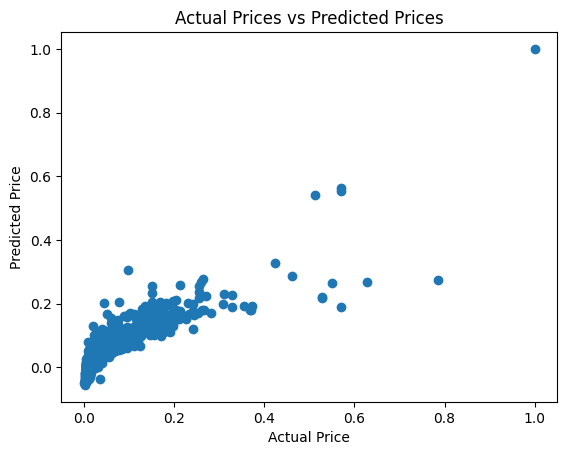

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

rmse = sqrt(metrics.mean_squared_error(Y_test,test_data_prediction))
print("Root Mean squared Error : ", rmse)

mae = sqrt(metrics.mean_absolute_error(Y_test,test_data_prediction))
print("Max Absolute Error : ", mae)

log_predicted = np.log1p(test_data_prediction)
log_actual = np.log1p(Y_test)

# Calculate the mean squared error (MSE) between the logarithm of predicted and actual values
mse = metrics.mean_squared_error(log_actual, log_predicted)

# Calculate the RMSLE score
rmsle = np.sqrt(mse)

print("Root Mean Squared Logarithmic Error : ", rmsle)



R squared Error :  0.7194900289628019
Root Mean squared Error :  0.028217540476785558
Max Absolute Error :  0.13841035217155692
Root Mean Squared Logarithmic Error :  0.02549160317429197


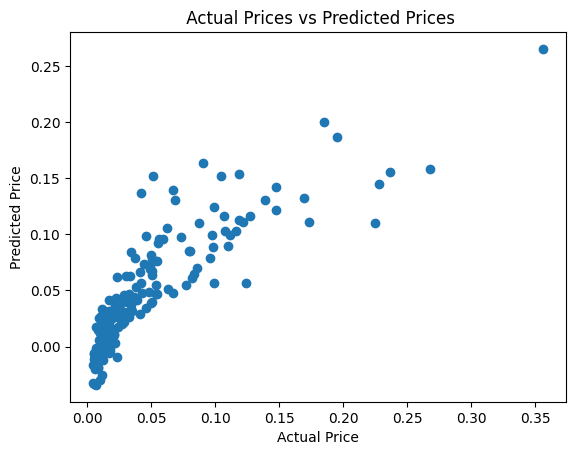

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


2. Decision Tre

CROSS VALIDATION (Decision Tree)

In [ ]:
scores = cross_val_score(DecisionTreeRegressor(), X, Y, cv=10)
accuracies = cross_val_score(DecisionTreeRegressor(), X, Y,scoring='neg_root_mean_squared_error', cv=10)
mae_scores = -cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring=mae_scorer)
max_error_scores = -cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring='neg_mean_squared_log_error')

print("Cross-validation scores:", scores)
print('\n')
print("R2 score:", scores.mean())
print("RMSE score:", -accuracies.mean())
print("MAE score:", mae_scores.mean())
print("RMSLE:", max_error_scores.mean())

Cross-validation scores: [0.86210177 0.63063656 0.4986985  0.85585891 0.91399797 0.73458569
 0.93815682 0.89268478 0.5664804  0.68599368]


R2 score: 0.7579195086911392
RMSE score: 0.03178766711362686
MAE score: 0.010925597898766902
RMSLE: 0.0007435085306904488


In [ ]:
# loading the linear regression model
decision_reg_model = DecisionTreeRegressor()

In [ ]:
decision_reg_model.fit(X_train,Y_train)

DecisionTreeRegressor()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = decision_reg_model.predict(X_train)


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)
mse = sqrt(metrics.mean_squared_error(Y_test,test_data_prediction))
print(" Root Mean squared Error : ", mse)


R squared Error :  0.9999781980542123
 Root Mean squared Error :  0.028217540476785558


Visualize the actual prices and Predicted prices

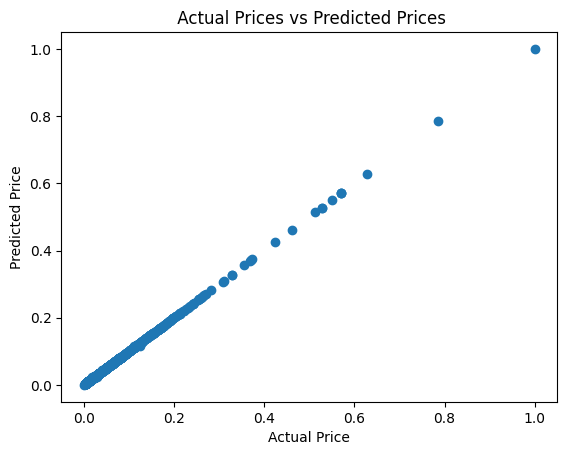

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = decision_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

rmse = sqrt(metrics.mean_squared_error(Y_test,test_data_prediction))
print("Root Mean squared Error : ", rmse)

mae = sqrt(metrics.mean_absolute_error(Y_test,test_data_prediction))
print("Max Absolute Error : ", mae)

log_predicted = np.log1p(test_data_prediction)
log_actual = np.log1p(Y_test)

# Calculate the mean squared error (MSE) between the logarithm of predicted and actual values
mse = metrics.mean_squared_error(log_actual, log_predicted)

# Calculate the RMSLE score
rmsle = np.sqrt(mse)

print("Root Mean Squared Logarithmic Error : ", rmsle)



R squared Error :  0.83662264073777
Root Mean squared Error :  0.02153480487777239
Max Absolute Error :  0.09207387234423693
Root Mean Squared Logarithmic Error :  0.018515452512286545


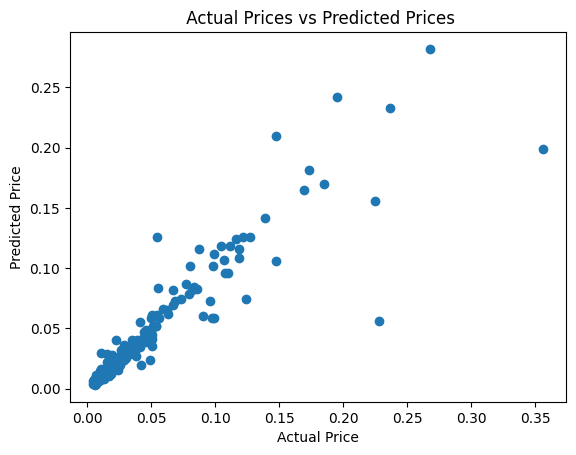

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Random Forest


CROSS VALIDATION (Random Forest)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
scores = cross_val_score(rf, X, Y, cv=10)
accuracies = cross_val_score(rf, X, Y,scoring='neg_root_mean_squared_error', cv=10)
mae_scores = -cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring=mae_scorer)
max_error_scores = -cross_val_score(DecisionTreeRegressor(), X, Y, cv=10, scoring='neg_mean_squared_log_error')

print("Cross-validation scores:", scores)
print('\n')
print("R2 score:", scores.mean())
print("RMSE score:", -accuracies.mean())
print("MAE score:", mae_scores.mean())
print("RMSLE:", max_error_scores.mean())

Cross-validation scores: [0.88544387 0.78275536 0.66245687 0.84794922 0.93183951 0.80287246
 0.86398233 0.94368352 0.84557573 0.76971999]


R2 score: 0.8336278879443191
RMSE score: 0.027189692438020635
MAE score: 0.011024429225825538
RMSLE: 0.0006715550349546615


Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, random_state=42)

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = rf.predict(X_train)


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)




R squared Error :  0.9682029356221447


Visualize the actual prices and Predicted prices

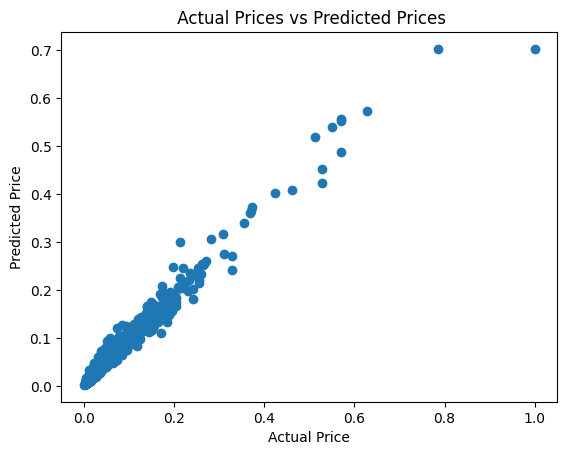

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = rf.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

rmse = sqrt(metrics.mean_squared_error(Y_test,test_data_prediction))
print("Root Mean squared Error : ", rmse)

mae = sqrt(metrics.mean_absolute_error(Y_test,test_data_prediction))
print("Max Absolute Error : ", mae)

log_predicted = np.log1p(test_data_prediction)
log_actual = np.log1p(Y_test)

# Calculate the mean squared error (MSE) between the logarithm of predicted and actual values
mse = metrics.mean_squared_error(log_actual, log_predicted)

# Calculate the RMSLE score
rmsle = np.sqrt(mse)

print("Root Mean Squared Logarithmic Error : ", rmsle)



R squared Error :  0.9247214693083253
Root Mean squared Error :  0.014617751408154956
Max Absolute Error :  0.08763665347950672
Root Mean Squared Logarithmic Error :  0.012859105812106527


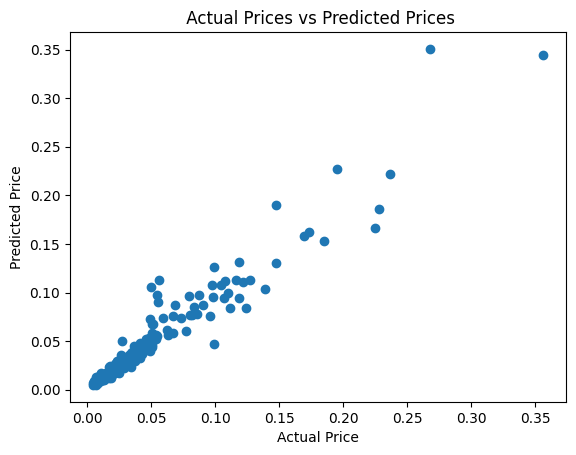

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()